In [29]:
# # Install essential packages
# install.packages("tidyverse")
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("caret")
# install.packages("randomForest")
# install.packages("e1071")

#install.packages("mice", dependencies=TRUE)


### Import Libraries

In [1]:
# Load essential libraries
library(tidyverse)
library(caret)
library(ggplot2)
library(randomForest)
library(e1071)
library(mice)  # Load the package

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Warning message in check_dep_version():
“ABI version mismatch: 
lme4 was built with Matrix ABI v

In [2]:
# Install and load the conflicted package (if not installed, install first)
if (!requireNamespace("conflicted", quietly = TRUE)) {
  install.packages("conflicted")
}
# Ensure conflicted is loaded
library(conflicted)
#conflicts()  # Check what functions have conflicts
#conflicted::conflict_scout()

# Explicitly resolve conflicts
conflicted::conflict_prefer("filter", "dplyr")  # Always use dplyr::filter()
conflicted::conflict_prefer("lag", "dplyr")     # Always use dplyr::lag()

# Resolve conflicts explicitly
conflicted::conflict_prefer("combine", "dplyr")  # Prefer dplyr::combine()
conflicted::conflict_prefer("filter", "dplyr")   # Prefer dplyr::filter()
conflicted::conflict_prefer("lag", "dplyr")      # Prefer dplyr::lag()
conflicted::conflict_prefer("lift", "purrr")     # Prefer purrr::lift()
conflicted::conflict_prefer("margin", "ggplot2") # Prefer ggplot2::margin()

options(warn = -1)  # Suppress warnings globally
#options(warn = 0)  # Re-enable warnings

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.
[conflicted] Will prefer dplyr::combine over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::lag over any other package.
[conflicted] Will prefer purrr::lift over any other package.
[conflicted] Will prefer ggplot2::margin over any other package.


### Load Data set

In [3]:
# Get the current directory
getwd()

[1] "/home/jparep/proj/healthcare-analytics-with-R"

In [4]:
data <- read.csv("./data/US_chronic_disease_indicator.csv")

### EDA

In [5]:
# Get summary of the data
summary(data)

   YearStart       YearEnd     LocationAbbr       LocationDesc      
 Min.   :2001   Min.   :2001   Length:403984      Length:403984     
 1st Qu.:2011   1st Qu.:2012   Class :character   Class :character  
 Median :2013   Median :2013   Mode  :character   Mode  :character  
 Mean   :2013   Mean   :2013                                        
 3rd Qu.:2014   3rd Qu.:2014                                        
 Max.   :2016   Max.   :2016                                        
                                                                    
  DataSource           Topic             Question         Response      
 Length:403984      Length:403984      Length:403984      Mode:logical  
 Class :character   Class :character   Class :character   NA's:403984   
 Mode  :character   Mode  :character   Mode  :character                 
                                                                        
                                                                        
          

In [6]:
# Shape of the data
dim(data)

[1] 403984     34

In [7]:
# Display the data structure
str(data)

'data.frame':	403984 obs. of  34 variables:
 $ YearStart                : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ YearEnd                  : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ LocationAbbr             : chr  "AK" "AL" "AR" "AZ" ...
 $ LocationDesc             : chr  "Alaska" "Alabama" "Arkansas" "Arizona" ...
 $ DataSource               : chr  "YRBSS" "YRBSS" "YRBSS" "YRBSS" ...
 $ Topic                    : chr  "Alcohol" "Alcohol" "Alcohol" "Alcohol" ...
 $ Question                 : chr  "Alcohol use among youth" "Alcohol use among youth" "Alcohol use among youth" "Alcohol use among youth" ...
 $ Response                 : logi  NA NA NA NA NA NA ...
 $ DataValueUnit            : chr  "%" "%" "%" "%" ...
 $ DataValueType            : chr  "Crude Prevalence" "Crude Prevalence" "Crude Prevalence" "Crude Prevalence" ...
 $ DataValue                : chr  "22" "30.7" "27.6" "34.8" ...
 $ DataValueAlt             : num  22 30.7 27.6 34.8 2

In [8]:
# Check for missing values
colSums(is.na(data))

YearStart                   YearEnd              LocationAbbr 
                        0                         0                         0 
             LocationDesc                DataSource                     Topic 
                        0                         0                         0 
                 Question                  Response             DataValueUnit 
                        0                    403984                         0 
            DataValueType                 DataValue              DataValueAlt 
                        0                         0                    130318 
  DataValueFootnoteSymbol         DatavalueFootnote        LowConfidenceLimit 
                        0                         0                    157165 
      HighConfidenceLimit   StratificationCategory1           Stratification1 
                   157165                         0                         0 
  StratificationCategory2           Stratification2   StratificationCategory3 
                   403984                    403984                    403984 
          Stratification3               GeoLocation                ResponseID 
                   403984                         0                    403984 
               LocationID                   TopicID                QuestionID 
                        0                         0                         0 
          DataValueTypeID StratificationCategoryID1         StratificationID1 
                        0                         0                         0 
StratificationCategoryID2         StratificationID2 StratificationCategoryID3 
                   403984                    403984                    403984 
        StratificationID3 
                   403984

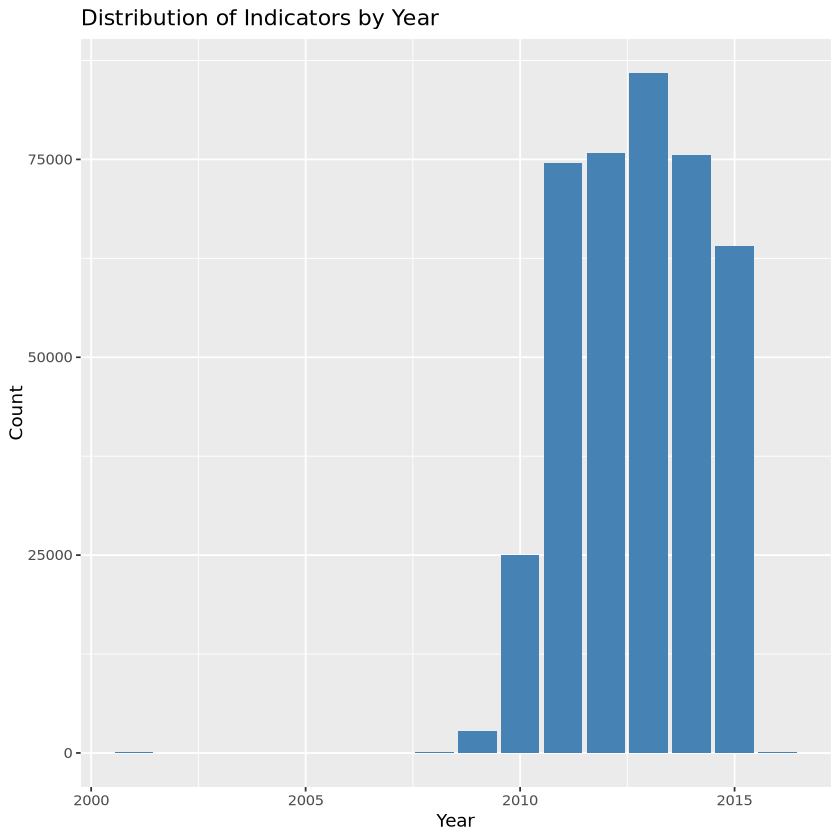

In [9]:
# Plot distribution of indicators by year
ggplot(data, aes(x = YearStart)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Indicators by Year", x = "Year", y = "Count")


1. ### Data processing - NA Omit

In [10]:
# Remove rows withg missing values
cleaned_data <- na.omit(data)
colSums(is.na(cleaned_data))

YearStart                   YearEnd              LocationAbbr 
                        0                         0                         0 
             LocationDesc                DataSource                     Topic 
                        0                         0                         0 
                 Question                  Response             DataValueUnit 
                        0                         0                         0 
            DataValueType                 DataValue              DataValueAlt 
                        0                         0                         0 
  DataValueFootnoteSymbol         DatavalueFootnote        LowConfidenceLimit 
                        0                         0                         0 
      HighConfidenceLimit   StratificationCategory1           Stratification1 
                        0                         0                         0 
  StratificationCategory2           Stratification2   StratificationCategory3 
                        0                         0                         0 
          Stratification3               GeoLocation                ResponseID 
                        0                         0                         0 
               LocationID                   TopicID                QuestionID 
                        0                         0                         0 
          DataValueTypeID StratificationCategoryID1         StratificationID1 
                        0                         0                         0 
StratificationCategoryID2         StratificationID2 StratificationCategoryID3 
                        0                         0                         0 
        StratificationID3 
                        0

2. #### Preprocessing the data with MICCE


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,⋯,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,
246819,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,10
26847,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,12
130318,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,13
,0,0,0,0,0,0,0,0,0,0,⋯,403984,403984,403984,403984,403984,403984,403984,403984,403984,4484488


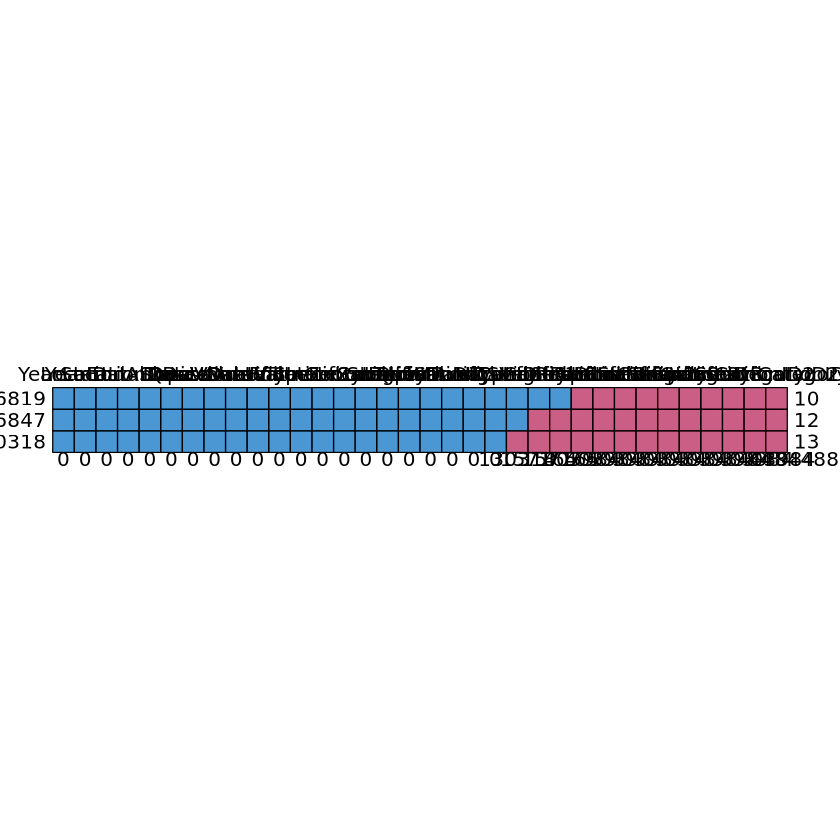

In [11]:
# Check Misisng values
md.pattern(data)  # Shows the missing data pattern

### Perform Imputation Using MICE

In [12]:
# Automatically identify numeric and categorical features
numeric_columns <- sapply(data, is.numeric)  # Logical vector for numeric columns
categorical_columns <- sapply(data, function(x) is.factor(x) | is.character(x))  # Logical vector for categorical columns
# Display which columns are numeric and which are categorical
print("Numeric columns:")
print(names(data)[numeric_columns])

[1] "Numeric columns:"


[1] "YearStart"           "YearEnd"             "DataValueAlt"       
[4] "LowConfidenceLimit"  "HighConfidenceLimit" "LocationID"         


In [13]:
print("Categorical columns:")
print(names(data)[categorical_columns])

[1] "Categorical columns:"
 [1] "LocationAbbr"              "LocationDesc"             
 [3] "DataSource"                "Topic"                    
 [5] "Question"                  "DataValueUnit"            
 [7] "DataValueType"             "DataValue"                
 [9] "DataValueFootnoteSymbol"   "DatavalueFootnote"        
[11] "StratificationCategory1"   "Stratification1"          
[13] "GeoLocation"               "TopicID"                  
[15] "QuestionID"                "DataValueTypeID"          
[17] "StratificationCategoryID1" "StratificationID1"        


In [14]:
# Now specify imputation methods based on the column types
methods <- rep(NA, ncol(data))  # Initialize an empty vector to store methods

# Assign imputation methods based on column type
methods[numeric_columns] <- "pmm"   # Use 'pmm' for numeric columns
methods[categorical_columns] <- "logreg"  # Use 'logreg' for categorical columns

In [15]:
# Check if any methods are still NA and handle them
methods[is.na(methods)] <- "pmm"  # Assign 'pmm' for any columns that still have NA

In [16]:
print(methods)


 [1] "pmm"    "pmm"    "logreg" "logreg" "logreg" "logreg" "logreg" "pmm"   
 [9] "logreg" "logreg" "logreg" "pmm"    "logreg" "logreg" "pmm"    "pmm"   
[17] "logreg" "logreg" "pmm"    "pmm"    "pmm"    "pmm"    "logreg" "pmm"   
[25] "pmm"    "logreg" "logreg" "logreg" "logreg" "logreg" "pmm"    "pmm"   
[33] "pmm"    "pmm"   


In [17]:
# Perform MICE imputation with the correctly filled methods vector
imputed_data <- mice(data, m = 5, method = methods, seed = 123)

# Complete the imputation
completed_data <- complete(imputed_data)

# View the completed data
print(completed_data)



 iter imp variable
  1   1  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  1   2  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  1   3  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  1   4  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  1   5  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  2   1  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  2   2  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  2   3  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  2   4  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  2   5  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  3   1  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  3   2  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  3   3  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  3   4  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  3   5  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
  4   1  DataValueAlt  LowConfidenc

In [18]:
# Check the methods vector
print(methods)

# Find which columns have NA in methods
which(is.na(methods))


 [1] "pmm"    "pmm"    "logreg" "logreg" "logreg" "logreg" "logreg" "pmm"   
 [9] "logreg" "logreg" "logreg" "pmm"    "logreg" "logreg" "pmm"    "pmm"   
[17] "logreg" "logreg" "pmm"    "pmm"    "pmm"    "pmm"    "logreg" "pmm"   
[25] "pmm"    "logreg" "logreg" "logreg" "logreg" "logreg" "pmm"    "pmm"   
[33] "pmm"    "pmm"   


integer(0)

In [19]:
# # Convert categorical variables to factors
# chronic_disease_data$Category <- as.factor(chronic_disease_data$Category)
# chronic_disease_data$Topic <- as.factor(chronic_disease_data$Topic)
# chronic_disease_data$Question <- as.factor(chronic_disease_data$Question)
# chronic_disease_data$DataValueType <- as.factor(chronic_disease_data$DataValueType)
# chronic_disease_data$LocationAbbr <- as.factor(chronic_disease_data$LocationAbbr)
# chronic_disease_data$LocationDesc <- as.factor(chronic_disease_data$LocationDesc)
# #

#### Data Visualization

Selecting by n


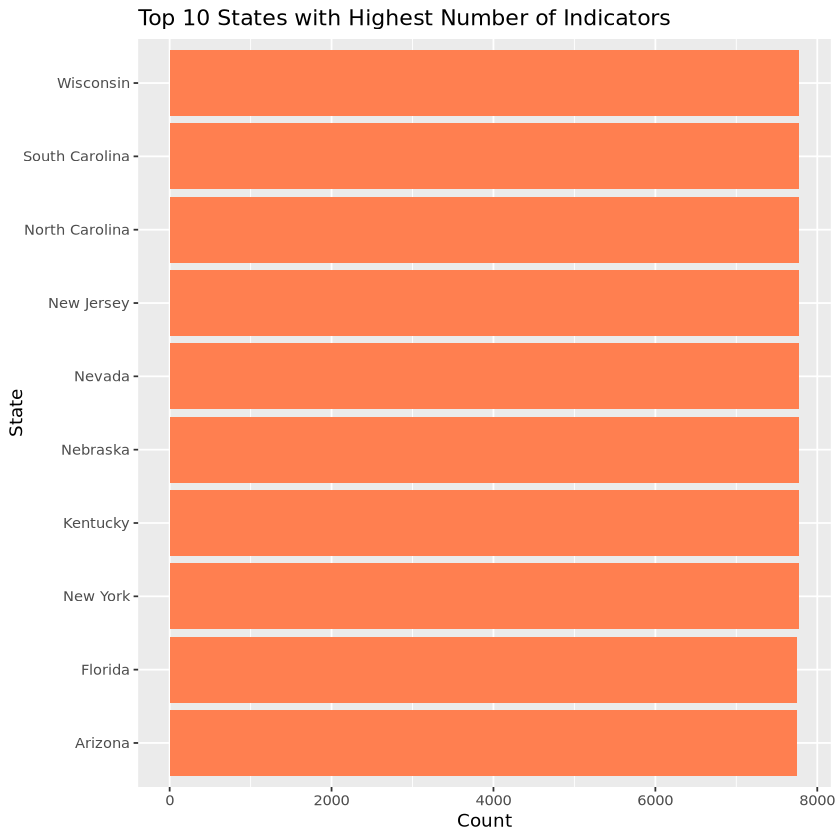

In [20]:
# Plot top 10 states with highest number of indicators
completed_data %>%
  count(LocationDesc) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(LocationDesc, n), y = n)) +
  geom_bar(stat = "identity", fill = "coral") +
  coord_flip() +
  labs(title = "Top 10 States with Highest Number of Indicators", x = "State", y = "Count")


### Distribution of Data Value Types

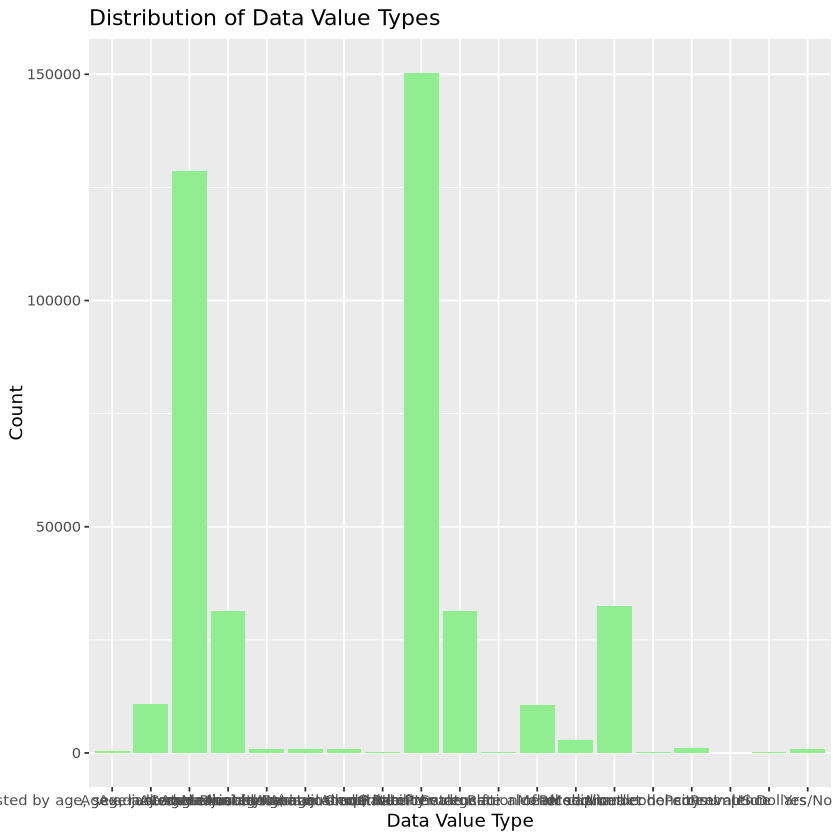

In [21]:
# Plot distribution of data value types
ggplot(completed_data, aes(x = DataValueType)) +
  geom_bar(fill = "lightgreen") +
  labs(title = "Distribution of Data Value Types", x = "Data Value Type", y = "Count")


### Model Building

In [22]:
colnames(completed_data)


[1] "YearStart"                 "YearEnd"                  
 [3] "LocationAbbr"              "LocationDesc"             
 [5] "DataSource"                "Topic"                    
 [7] "Question"                  "Response"                 
 [9] "DataValueUnit"             "DataValueType"            
[11] "DataValue"                 "DataValueAlt"             
[13] "DataValueFootnoteSymbol"   "DatavalueFootnote"        
[15] "LowConfidenceLimit"        "HighConfidenceLimit"      
[17] "StratificationCategory1"   "Stratification1"          
[19] "StratificationCategory2"   "Stratification2"          
[21] "StratificationCategory3"   "Stratification3"          
[23] "GeoLocation"               "ResponseID"               
[25] "LocationID"                "TopicID"                  
[27] "QuestionID"                "DataValueTypeID"          
[29] "StratificationCategoryID1" "StratificationID1"        
[31] "StratificationCategoryID2" "StratificationID2"        
[33] "StratificationCategoryID3" "StratificationID3"

In [23]:
model_data <- completed_data %>%
  select(YearStart, DataValue, Topic, DataValueType, LocationDesc)


Or, if StratificationCategory1 is the correct equivalent:

In [24]:
model_data <- completed_data %>%
  select(YearStart, DataValue, StratificationCategory1, Topic, DataValueType, LocationDesc)


In [25]:
grep("Category", colnames(completed_data), value = TRUE)


[1] "StratificationCategory1"   "StratificationCategory2"  
[3] "StratificationCategory3"   "StratificationCategoryID1"
[5] "StratificationCategoryID2" "StratificationCategoryID3"

In [26]:
model_data <- completed_data %>%
  select(YearStart, DataValue, StratificationCategory1, Topic, DataValueType, LocationDesc)


In [27]:
model_data <- completed_data %>%
  select(YearStart, DataValue, StratificationCategory1, StratificationCategory2, StratificationCategory3, Topic, DataValueType, LocationDesc)


In [28]:
head(completed_data[c("StratificationCategory1", "StratificationCategory2", "StratificationCategory3")])


,StratificationCategory1,StratificationCategory2,StratificationCategory3
,<chr>,<lgl>,<lgl>
1,Overall,NA,NA
2,Overall,NA,NA
3,Overall,NA,NA
4,Overall,NA,NA
5,Overall,NA,NA
6,Overall,NA,NA


In [30]:
summary(data)

   YearStart       YearEnd     LocationAbbr       LocationDesc      
 Min.   :2001   Min.   :2001   Length:403984      Length:403984     
 1st Qu.:2011   1st Qu.:2012   Class :character   Class :character  
 Median :2013   Median :2013   Mode  :character   Mode  :character  
 Mean   :2013   Mean   :2013                                        
 3rd Qu.:2014   3rd Qu.:2014                                        
 Max.   :2016   Max.   :2016                                        
                                                                    
  DataSource           Topic             Question         Response      
 Length:403984      Length:403984      Length:403984      Mode:logical  
 Class :character   Class :character   Class :character   NA's:403984   
 Mode  :character   Mode  :character   Mode  :character                 
                                                                        
                                                                        
          

ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic.
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimety

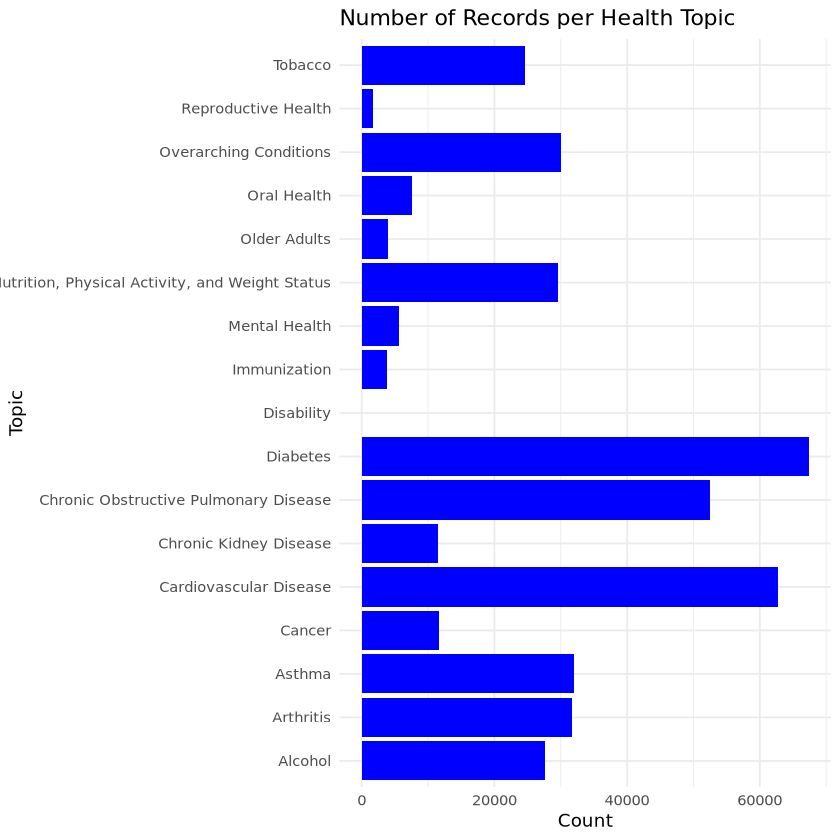

In [32]:
# Distribution of Data Values
ggplot(data, aes(x = DataValue)) +
  geom_histogram(fill = "blue", color = "black", bins = 30) +
  theme_minimal() +
  labs(title = "Distribution of Data Values", x = "Data Value", y = "Frequency")

# Count of observations per topic
ggplot(data, aes(x = Topic)) +
  geom_bar(fill = "blue") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Number of Records per Health Topic", x = "Topic", y = "Count")


In [ ]:
# Relationship between DataValue and Low/High Confidence Limit
ggplot(data, aes(x = LowConfidenceLimit, y = HighConfidenceLimit, color = DataValue)) +
  geom_point(alpha = 0.6) +
  theme_minimal() +
  labs(title = "Scatter Plot: Low vs High Confidence Limits", x = "Low Confidence Limit", y = "High Confidence Limit")

# DataValue across years
ggplot(data, aes(x = YearStart, y = DataValue, group = 1)) +
  geom_line(color = "blue") +
  geom_point() +
  theme_minimal() +
  labs(title = "Trend of Data Values Over the Years", x = "Year", y = "Data Value")
